In [110]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import perceptron
import perceptron_wr

In [111]:
#Lendo a base de dados
df = pd.read_csv('ionosphere.data')

In [112]:
#Criando os objetos 
percept = perceptron.Perceptron(learning_rate=0.1, n_epochs=100)
percept_wr = perceptron_wr.PerceptronWithRegularization(learning_rate=0.1, n_epochs=100, alpha=0.01)

In [113]:
#Extraindo as features e as classes do conjunto de dados
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
y = np.where(y == 'g', 1, -1)

In [114]:
data_lens = [0.3, 0.35, 0.4, 0.45, 0.5]

### Perceptron: 

In [115]:
train = []
test  = []

for data_len in data_lens:
  
  # Divide o conjunto de dados em dados de treinamento e teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=data_len, random_state=42)

  # Padroniza os dados de treinamento e teste
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # Testa o perceptron sem regularização nos dados de treinamento e teste
  percept.fit(X_train, y_train)
  y_pred_train = percept.predict(X_train)
  y_pred_test = percept.predict(X_test)

  # Calcula a acurácia nos dados de treinamento e teste
  train.append(accuracy_score(y_train, y_pred_train))
  test.append(accuracy_score(y_test, y_pred_test))

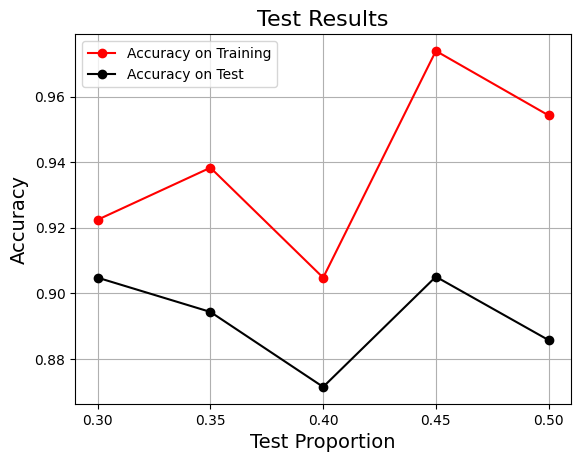

In [116]:
#Resultados
fig, ax = plt.subplots()

ax.plot(data_lens, train, '-o', label='Accuracy on Training', color = 'red')
ax.plot(data_lens, test, '-o', label='Accuracy on Test', color = 'black')

ax.set_xlabel('Test Proportion', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_title('Test Results', fontsize=16)

ax.grid(True)
ax.set_xticks(data_lens)

ax.legend()
plt.show()

### Perceptron with regularization:

In [117]:
train = []
test  = []

for data_len in data_lens:
  
  # Divide o conjunto de dados em dados de treinamento e teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=data_len, random_state=42)

  # Padroniza os dados de treinamento e teste
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # Testa o perceptron sem regularização nos dados de treinamento e teste
  percept_wr.fit(X_train, y_train)
  y_pred_train = percept_wr.predict(X_train)
  y_pred_test = percept_wr.predict(X_test)

  # Calcula a acurácia nos dados de treinamento e teste
  train.append(accuracy_score(y_train, y_pred_train))
  test.append(accuracy_score(y_test, y_pred_test))

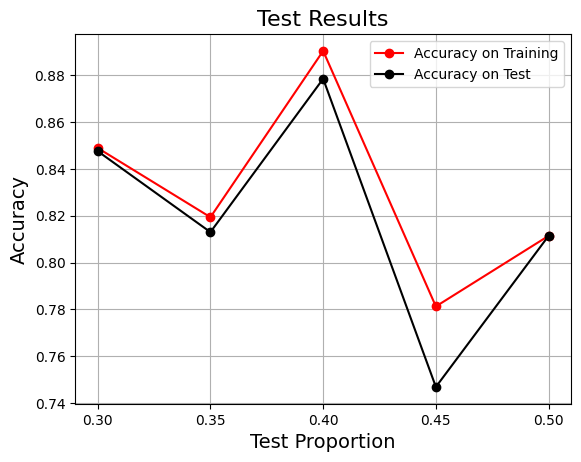

In [118]:
#Resultados
fig, ax = plt.subplots()

ax.plot(data_lens, train, '-o', label='Accuracy on Training', color = 'red')
ax.plot(data_lens, test, '-o', label='Accuracy on Test', color = 'black')

ax.set_xlabel('Test Proportion', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_title('Test Results', fontsize=16)

ax.grid(True)
ax.set_xticks(data_lens)

ax.legend()
plt.show()